# Cluster de MNIST (tomado del archivo ejemploclusteringtsne)

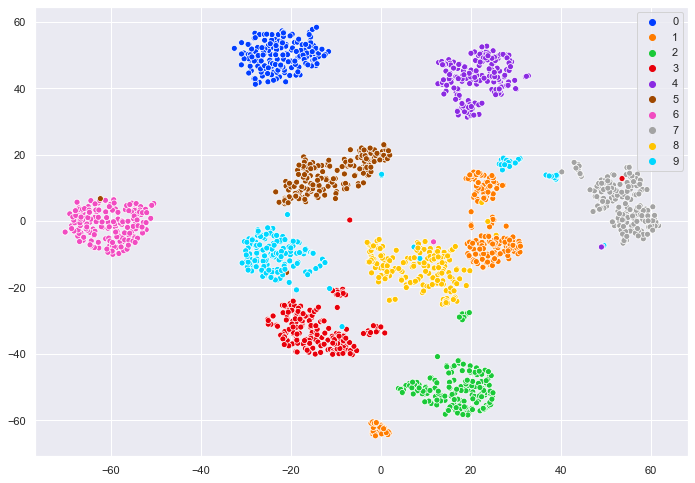

In [8]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold.t_sne import _joint_probabilities
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from scipy.spatial.distance import pdist
from scipy import linalg
from scipy.spatial.distance import squareform

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

X, y = load_digits(return_X_y=True)

tsne = TSNE()
 
X_embedded = tsne.fit_transform(X)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

plt.show()

# Clasificador de Mnist, con y sin t-SNE

In [9]:
# Horrible fix para evitar warnings causados por diferentes versiones de np y tensorflow
# https://github.com/tensorflow/tensorflow/issues/30427
import warnings
warnings.filterwarnings('ignore')

from time import time

seed = 19960614
np.random.seed(seed)

## Genero un árbol sin t-SNE

In [10]:
X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=seed)

dt = DecisionTreeClassifier(random_state=seed)

t0 = time()
dt.fit(x_train, y_train)
t1 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t1-t0, 2)))

resultado_sin_tsne = dt.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy sin tsne: {}'.format(round(accuracy_score(y_test, resultado_sin_tsne) * 100, 2)))

Tiempo que tarda en entrenar el modelo: 0.01 s
Accuracy sin tsne: 84.22


## Genero un árbol utilizando t-SNE

Tiempo que tarda en convertir los datos: 6.1 s


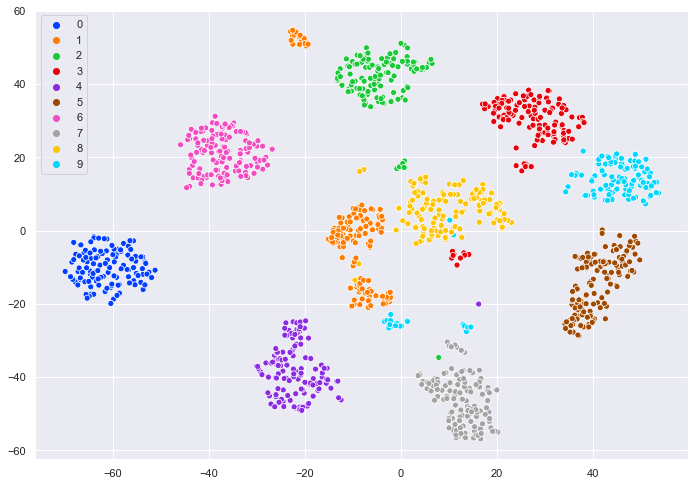

Tiempo que tarda en entrenar el modelo: -0.0 s
Accuracy con tsne: 97.33


In [11]:
X, y = load_digits(return_X_y=True)

tsne = TSNE()

t0 = time()
tsned_images = tsne.fit_transform(X)
t1 = time()
print('Tiempo que tarda en convertir los datos: {} s'.format(round(t1-t0,2)))

# tsned_train y test, por ser un manifold, deberia de ser dimension 2 (al ser una representacion de un grafo)
dt = DecisionTreeClassifier(random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(tsned_images, y, random_state=seed)

sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, legend='full', palette=palette)
plt.show()

t2 = time()
dt.fit(X_train, y_train)
t3 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t2-t3,2)))

resultado_con_tsne = dt.predict(X_test)

print('Accuracy con tsne: {}'.format(round(accuracy_score(y_test, resultado_con_tsne) * 100, 2)))

## Mejora a t-SNE

Usando t-SNE, no solo tarde un tiempo mucho mayor, sino que el resultado obtenido es considerablemente peor.

Utilizando como guia: https://www.kaggle.com/carlolepelaars/97-on-mnist-with-a-single-decision-tree-t-sne

Previo a realizar el t-SNE, reduzco la dimensionalidad por medio de Truncated Singular Value Decomposition (TSVD).

Tiempo que tarda convertir los datos con tsvd: 0.01 s
Tiempo que tarda convertir los datos de tsvd con tsne: 5.63 s
Scatterplot de imagenes despues de la corrida tsvd y tsne


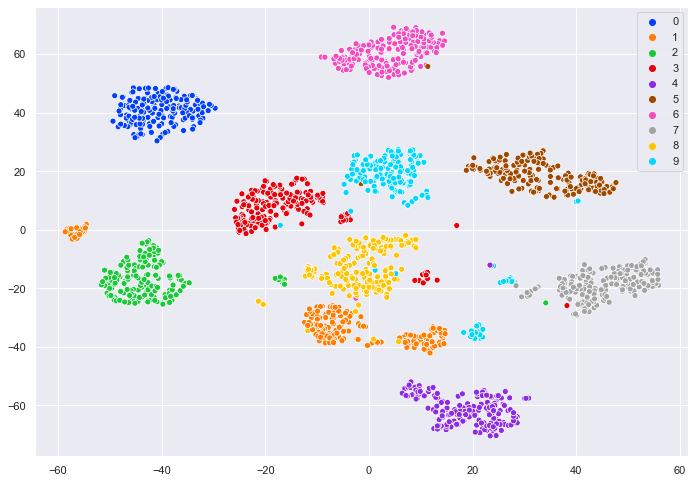

Tiempo que tarda en entrenar el modelo: 0.0 s
Accuracy con tsvd y tsne: 96.44


In [12]:
X, y = load_digits(return_X_y=True)

t0 = time()
tsvd_images = TruncatedSVD(n_components=50).fit_transform(X)
t1 = time()
print('Tiempo que tarda convertir los datos con tsvd: {} s'.format(round(t1-t0,2)))

tsne = TSNE()

t2 = time()
tsvd_tsne_images = tsne.fit_transform(tsvd_images)
t3 = time()
print('Tiempo que tarda convertir los datos de tsvd con tsne: {} s'.format(round(t3-t2,2)))

print('Scatterplot de imagenes despues de la corrida tsvd y tsne')
sns.scatterplot(tsvd_tsne_images[:,0], tsvd_tsne_images[:,1], hue=y, legend='full', palette=palette)

plt.show()

dt = DecisionTreeClassifier(random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(tsvd_tsne_images, y, random_state=seed)

t4 = time()
dt.fit(X_train, y_train)
t5 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t5-t4,2)))

resultado_con_tsne = dt.predict(X_test)

print('Accuracy con tsvd y tsne: {}'.format(round(accuracy_score(y_test, resultado_con_tsne) * 100, 2)))